###PART 5
####Problem Statement: School District with Higher Average ELA Score in Grade 6 in 2006 SHOULD have a higher SAT Score
#####NULL HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has NO Correlation to Average ELA Score in Grade 6 in 2006  in NYC School District(1-32)
#####ALTERNATE HYPOTHESIS: SAT Scores of  Students in NYC School District(1-32)  has POSITIVE Correlation to Average ELA Score in Grade 6 in 2006  in NYC School District(1-32)

In [46]:
#Importing Packages
import csv
import urllib2
import os
import pylab as pl
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline 

# IMPORTING THE FILE FOR SAT SCORES FOR 2012
SAT_Score = pd.read_csv("https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD")
SAT_Score


Populating the interactive namespace from numpy and matplotlib


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


In [47]:
SAT_Score.replace('s','NaN', inplace=True, regex=True)
SAT_Score = SAT_Score.dropna()

In [48]:
SAT_Score['District'] = SAT_Score['DBN'].map(lambda x: str(x)[:2])
SAT_Score['District'] = (SAT_Score['District']).astype(float)
SAT_Score['SAT_avg_reading'] = (SAT_Score['SAT Critical Reading Avg. Score']).astype(float)
SAT_Score['SAT_avg_writing'] = (SAT_Score['SAT Writing Avg. Score']).astype(float)
# SAT_Score['SAT_avg_math'] = (SAT_Score['SAT Math Avg. Score']).astype(float)

SAT_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 9 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
District                           478 non-null float64
SAT_avg_reading                    421 non-null float64
SAT_avg_writing                    421 non-null float64
dtypes: float64(3), object(6)
memory usage: 37.3+ KB


In [49]:
SAT_Score = SAT_Score.groupby('District').mean()

In [50]:
SAT_Score = SAT_Score.reset_index()
SAT_Score = SAT_Score [0:32]

In [51]:
SAT_Score.head(3)

,District,SAT_avg_reading,SAT_avg_writing
0,1,423.777778,413.555556
1,2,424.068966,419.448276
2,3,424.846154,417.076923


In [52]:
SAT_Score['Total_English'] = pd.DataFrame(SAT_Score['SAT_avg_reading'] + SAT_Score['SAT_avg_writing'])

In [53]:
SAT_Score.head(3)

,District,SAT_avg_reading,SAT_avg_writing,Total_English
0,1,423.777778,413.555556,837.333333
1,2,424.068966,419.448276,843.517241
2,3,424.846154,417.076923,841.923077


In [54]:
eng_score = pd.read_csv('https://data.cityofnewyork.us/api/views/yhfh-vyns/rows.csv?accessType=DOWNLOAD')
eng_score.info()
eng_score

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1567
Data columns (total 16 columns):
District             1568 non-null int64
Grade                1568 non-null object
Year                 1568 non-null int64
Demographic          1568 non-null object
Number Tested        1568 non-null int64
Mean Scale Score     1568 non-null int64
Num Level 1          1568 non-null int64
Pct Level 1          1568 non-null float64
Num Level 2          1568 non-null int64
Pct Level 2          1568 non-null float64
Num Level 3          1568 non-null int64
Pct Level 3          1568 non-null float64
Num Level 4          1568 non-null int64
Pct Level 4          1568 non-null float64
Num Level 3 and 4    1568 non-null int64
Pct Level 3 and 4    1568 non-null float64
dtypes: float64(5), int64(9), object(2)
memory usage: 208.2+ KB


,District,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,3,2006,All Students,808,663,89,11.0,215,26.6,462,57.2,42,5.2,504,62.4
1,1,3,2007,All Students,826,659,94,11.4,242,29.3,427,51.7,63,7.6,490,59.3
2,1,3,2008,All Students,852,662,60,7.0,270,31.7,449,52.7,73,8.6,522,61.3
3,1,3,2009,All Students,901,667,45,5.0,221,24.5,553,61.4,82,9.1,635,70.5
4,1,3,2010,All Students,848,669,137,16.2,276,32.5,272,32.1,163,19.2,435,51.3
5,1,3,2011,All Students,813,665,103,12.7,265,32.6,371,45.6,74,9.1,445,54.7
6,1,3,2012,All Students,856,663,123,14.4,294,34.3,379,44.3,60,7.0,439,51.3
7,1,4,2006,All Students,819,654,103,12.6,272,33.2,405,49.5,39,4.8,444,54.2
8,1,4,2007,All Students,860,655,70,8.1,286,33.3,469,54.5,35,4.1,504,58.6
9,1,4,2008,All Students,843,657,74,8.8,251,29.8,480,56.9,38,4.5,518,61.4


In [55]:
english_score = eng_score.groupby(['District' , 'Grade' , 'Year']).mean()
english_score_reset = english_score.reset_index()
# math_score_by_district = mth_score_reset.groupby(['District']).mean()
# math_score_by_district_reset = math_score_by_district.reset_index()
english_score_2006 = english_score_reset[(english_score_reset.Grade == '6') & (english_score_reset.Year== 2006)]
# eng_scr = eng_scr.reset_index()
english_score_2006.head(3)

,District,Grade,Year,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
21,1,6,2006,855,653,58,6.8,346,40.5,363,42.5,88,10.3,451,52.7
70,2,6,2006,2106,666,76,3.6,529,25.1,1169,55.5,332,15.8,1501,71.3
119,3,6,2006,1473,651,124,8.4,618,42.0,572,38.8,159,10.8,731,49.6


In [56]:
english_score_2006['District'] = english_score_2006['District'].astype(float)
english_score_2006.head(3)

C:\Users\Anita_2\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,District,Grade,Year,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
21,1,6,2006,855,653,58,6.8,346,40.5,363,42.5,88,10.3,451,52.7
70,2,6,2006,2106,666,76,3.6,529,25.1,1169,55.5,332,15.8,1501,71.3
119,3,6,2006,1473,651,124,8.4,618,42.0,572,38.8,159,10.8,731,49.6


In [57]:
SAT_eng_vs_2006 = pd.merge(SAT_Score, english_score_2006, how='inner', on='District')
SAT_eng_vs_2006.columns
SAT_eng_vs_2006.info()
SAT_eng_vs_2006.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 18 columns):
District             32 non-null float64
SAT_avg_reading      32 non-null float64
SAT_avg_writing      32 non-null float64
Total_English        32 non-null float64
Grade                32 non-null object
Year                 32 non-null int64
Number Tested        32 non-null int64
Mean Scale Score     32 non-null int64
Num Level 1          32 non-null int64
Pct Level 1          32 non-null float64
Num Level 2          32 non-null int64
Pct Level 2          32 non-null float64
Num Level 3          32 non-null int64
Pct Level 3          32 non-null float64
Num Level 4          32 non-null int64
Pct Level 4          32 non-null float64
Num Level 3 and 4    32 non-null int64
Pct Level 3 and 4    32 non-null float64
dtypes: float64(9), int64(8), object(1)
memory usage: 4.8+ KB


,District,SAT_avg_reading,SAT_avg_writing,Total_English,Grade,Year,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,1,423.777778,413.555556,837.333333,6,2006,855,653,58,6.8,346,40.5,363,42.5,88,10.3,451,52.7
1,2,424.068966,419.448276,843.517241,6,2006,2106,666,76,3.6,529,25.1,1169,55.5,332,15.8,1501,71.3
2,3,424.846154,417.076923,841.923077,6,2006,1473,651,124,8.4,618,42.0,572,38.8,159,10.8,731,49.6


In [58]:
#Setting X and Y variables
Score_2006 = SAT_eng_vs_2006['Mean Scale Score']
Score_2012 = SAT_eng_vs_2006['Total_English']

# Fitting linear regression model 
model_SAT_eng_2006 = smf.ols(formula='(Score_2012) ~ (Score_2006) ' , data= SAT_eng_vs_2006).fit()
model_SAT_eng_2006.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Score_2012   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     33.23
Date:                Mon, 14 Dec 2015   Prob (F-statistic):           2.70e-06
Time:                        18:54:55   Log-Likelihood:                -161.16
No. Observations:                  32   AIC:                             326.3
Df Residuals:                      30   BIC:                             329.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1344.8055    370.911     -3.626      0.001     -2102.307  -587.304
Score_2006     3.3130      0.575      5.765      0.000         2.139     4.487
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.767
Skew:                           0.341   Prob(JB):                        0.681
Kurtosis:                       2.668   Cond. No.                     3.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 1st degree linear regression is 0.526, The model is predicting the real data at 52.6%.
For 1unit  increase in attendance rate the SAT score increase by 3.31units. The P>|t| is less than 0.05 therefore we can reject the hypothesis that the two values are not correlated.

In [42]:
# Fitting a second degree curve linear regression model
model2_SAT_eng_2006 = smf.ols(formula='(Score_2012) ~ (Score_2006) + I(Score_2006**2)', data= SAT_eng_vs_2006).fit()
model2_SAT_eng_2006.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Score_2012   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     16.09
Date:                Mon, 14 Dec 2015   Prob (F-statistic):           1.99e-05
Time:                        18:46:54   Log-Likelihood:                -161.15
No. Observations:                  32   AIC:                             328.3
Df Residuals:                      29   BIC:                             332.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept          -3786.1734   1.63e+04     -0.233      0.818     -3.71e+04  2.95e+04
Score_2006            10.8425     50.162      0.216      0.830       -91.750   113.435
I(Score_2006 ** 2)    -0.0058      0.039     -0.150      0.882        -0.085     0.073
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.672
Skew:                           0.313   Prob(JB):                        0.715
Kurtosis:                       2.666   Cond. No.                     9.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square for 2nd degree linear regression is 0.526, The model is predicting the real data at 52.6%.
Since the R-squared value is very similar for 1st Degree and 2nd Degree we cannot predict which model is a better, we will try visual Inspection.

624 677


(623, 678)

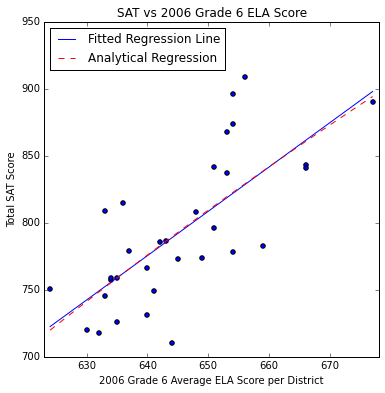

In [59]:

# Using limit values for linspace function
lower1 = np.min(Score_2006)
upper1 = np.max(Score_2006)
print lower1 , upper1

# Generating predicted values using the above model1 parameters
x_dummy = pd.DataFrame({'Score_2006': np.linspace(lower1, upper1, 50)})
predicted_model = model_SAT_eng_2006.predict(x_dummy)


# Generating predicted values using the above model2 parameters
predicted2_model = model2_SAT_eng_2006.predict(x_dummy)

pl.figure(figsize=(6, 6))
pl.title('SAT vs 2006 Grade 6 ELA Score')
pl.xlabel('2006 Grade 6 Average ELA Score per District')
pl.ylabel('Total SAT Score')
pl.scatter(Score_2006,Score_2012)
pl.plot(x_dummy, predicted_model, 'b', label="Fitted Regression Line", linestyle='-')
pl.plot(x_dummy,predicted2_model, 'r', linestyle='--', label = "Analytical Regression")
pl.legend(loc="upper left")
pl.xlim(int(lower1-1) , int(upper1+1))





In [44]:
print "R-squared value for 1st Degree Linear Regression Grade 6 ELA Score vs SAT Reading + writing Score:", model_SAT_eng_2006.rsquared
print "R-squared value for 2nd Degree Linear Regression Grade 6 ELA Score vs SAT Reading + writing Score:", model2_SAT_eng_2006.rsquared

R-squared value for 1st Degree Linear Regression Grade 6 ELA Score vs SAT Reading + writing Score: 0.525557609187
R-squared value for 2nd Degree Linear Regression Grade 6 ELA Score vs SAT Reading + writing Score: 0.525925983238


In [21]:

#LIKELIHOOD RATIO TEST 
model2_SAT_eng_2006.compare_lr_test(model_SAT_eng_2006)

(0.024855595839824218, 0.87472742008053084, 1.0)

Since the ratio I have gotten (0.024) is lower than the chi square value (3.84 for a significance level of 0.05) I can accept the null hypothesis. Therefore, Line model is better than curve model.